username: bassylone
password: bxjaksjvfit749176520
Logged in successfully
Processing following person: [ibnsenloran] followings...
Processing following person: [thescandinavianfelines] followings...
Processing following person: [mario_the_menace] followings...
Processing following person: [artemisa.husky] followings...
Error fetching data for artemisa.husky: Please wait a few minutes before you try again.
Processing following person: [arnoldtheragdoll] followings...
Error fetching data for arnoldtheragdoll: Please wait a few minutes before you try again.
Processing following person: [vuvus_blog] followings...
Error fetching data for vuvus_blog: Please wait a few minutes before you try again.
Processing following person: [lucrezia_exotic] followings...
Error fetching data for lucrezia_exotic: Please wait a few minutes before you try again.
Processing following person: [washington_meezers] followings...
Error fetching data for washington_meezers: Please wait a few minutes before you try 

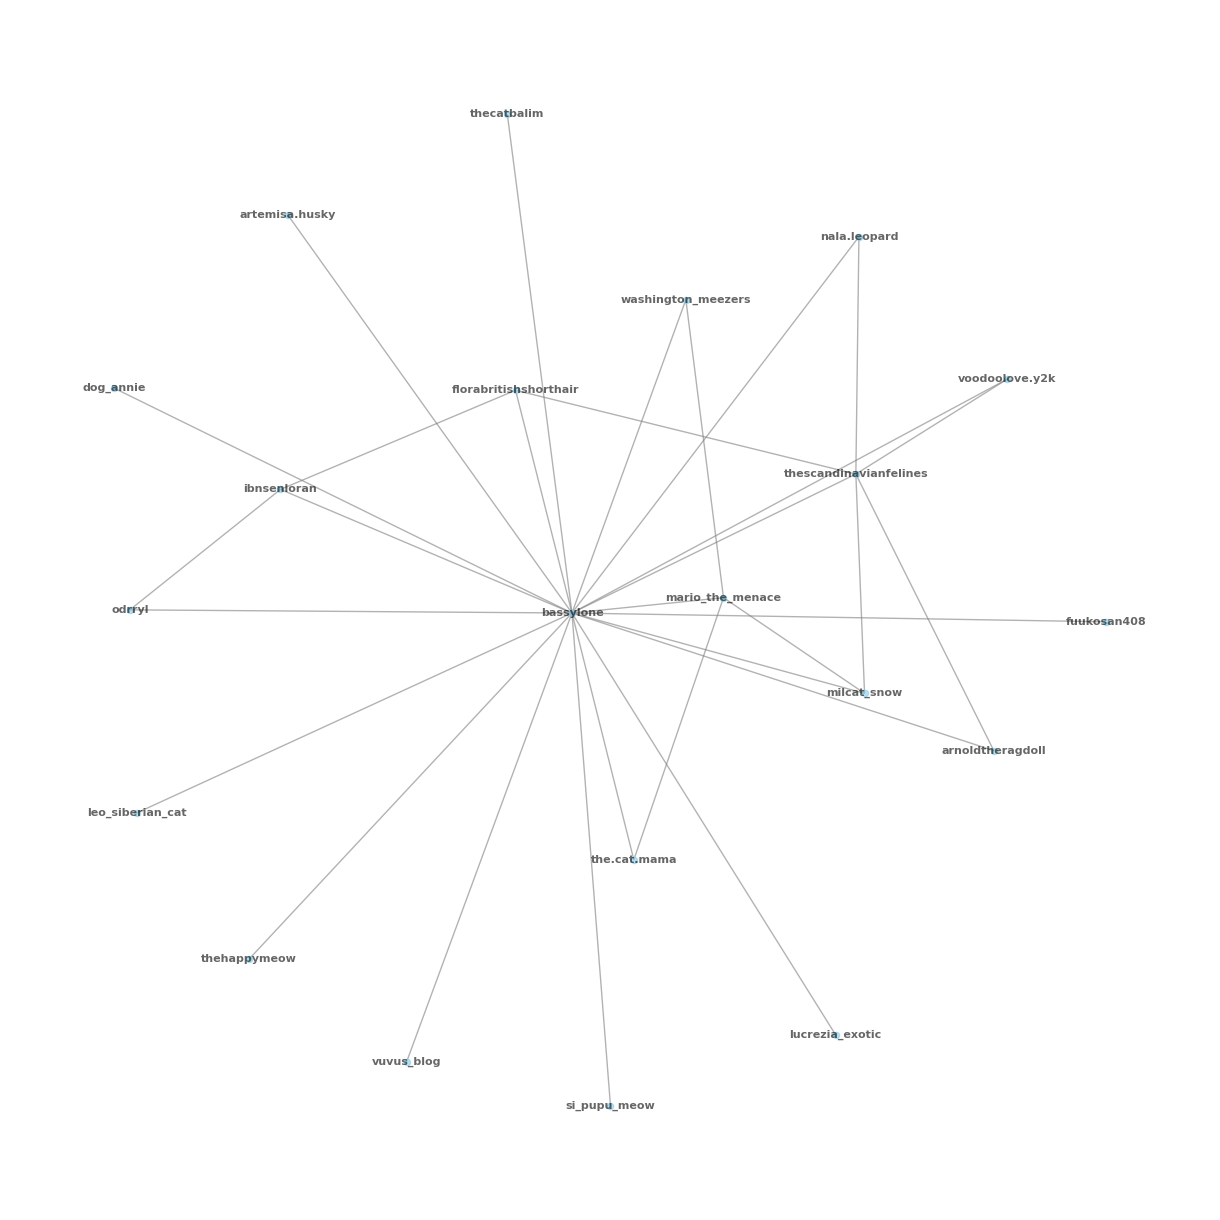

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from instagrapi import Client
from instagrapi.exceptions import TwoFactorRequired

MAX_FOLLOWINGS_COUNT = 20  # Max number of followers

# Login to Instagram
instagram_client = Client()
# Set delay according to recommendation
instagram_client.delay_range = [1, 5]

# Prompt for username and password
USERNAME = input("username: ")
PASSWORD = input("password: ")

# Check for non-empty login and password
assert USERNAME, 'LOGIN should be provided'
assert PASSWORD, 'PASSWORD should be provided'

# Try-except check for two-factor authentication
try:
    instagram_client.login(USERNAME, PASSWORD)
    print("Logged in successfully")
except TwoFactorRequired:
    print("Two-factor authentication required. Please disable it in your Instagram settings.")
    raise

# Fetch our followings
my_followings = instagram_client.user_following(
    user_id=instagram_client.user_id,
    amount=MAX_FOLLOWINGS_COUNT
)
my_followings_names = [user.username for user in my_followings.values()]

# Create graph
G = nx.Graph()
G.add_node(instagram_client.username, label=instagram_client.username)

for following in my_followings.values():
    G.add_node(following.username, label=following.full_name)
    G.add_edge(instagram_client.username, following.username)

# Fetch followings of our followings
for person in my_followings.values():
    try:
        print(f'Processing following person: [{person.username}] followings...')
        following_followings = instagram_client.user_following(person.pk)
        for following in following_followings.values():
            if following.username in my_followings_names:
                G.add_node(following.username, label=following.full_name)
                G.add_edge(person.username, following.username)
    except Exception as e:
        print(f"Error fetching data for {person.username}: {e}")

# Determine the number of edges in the graph
num_edges = G.number_of_edges()
print(f'The number of edges in the graph is: {num_edges}')

# Save the graph in GEXF format
print('Saving graph...')
nx.write_gexf(G, "InstaFriends.gexf")

# Visualize the graph using matplotlib
print("Drawing...")
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', font_size=8, node_size=20, node_color='skyblue', edge_color='gray', alpha=0.6)
plt.savefig('InstaGraph.png', dpi=600)
plt.show()
